<img src="https://minas.medellin.unal.edu.co/eventos/latwaves2018/images/logo_unal.png" alt="unal logo" width="200"/>

# ML 2022-1 Final Project
## Introductory Programming Task Repair using CodeBERT
### Dataset Exploratoy Data Analysis

By 
 - Diego Alejandro Herrera daherrerabu@unal.edu.co
 - Jheison Alejandro Morales jhmoralesva@unal.edu.co


## Goal

- Explore the initial data of UNCode and compare the differences between the attempts to solve a problem (code with bugs) to the final version (correct code).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install alive-progress

In [ ]:
!pip install editdistance

In [ ]:
base_path = 'dataset_project_ml'

metadata_df = pd.read_csv(f"{base_path}/metadata.csv")

In [ ]:
metadata_df.head()

,Unnamed: 0,date,courseid,task,username,result,submission,lang,type,saved
0,0,2021-09-22 12:22:11.021,IALPCP-GroupMLDS-2021-2,example_1,1ca3b9559f8c1785fa68f9c881bad75d,failed,614b664314f5fb141c9d4570,python3,code_multiple_languages,True
1,1,2021-09-22 12:22:33.940,IALPCP-GroupMLDS-2021-2,example_1,1ca3b9559f8c1785fa68f9c881bad75d,success,614b665914f5fb141c9d4577,python3,code_multiple_languages,True
2,2,2021-09-01 11:23:36.585,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,failed,612fa908470407b924c686f5,python3,code_multiple_languages,True
3,3,2021-09-01 11:25:27.472,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,failed,612fa977470407b924c68701,python3,code_multiple_languages,True
4,4,2021-09-01 11:26:00.128,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,failed,612fa998470407b924c68707,python3,code_multiple_languages,True


In [ ]:
metadata_df[metadata_df['saved']==False]

,Unnamed: 0,date,courseid,task,username,result,submission,lang,type,saved


In [ ]:
#¿Cuantas tareas hay?
tasks = metadata_df['task'].unique()
len(tasks)

18

In [ ]:
#¿Cuantos usuarios hay?
users = metadata_df['username'].unique()
len(users)

805

In [ ]:
# count success and failed
total_success = metadata_df[metadata_df['result'] == 'success']['result'].count()
total_failed = metadata_df[metadata_df['result'] == 'failed']['result'].count()


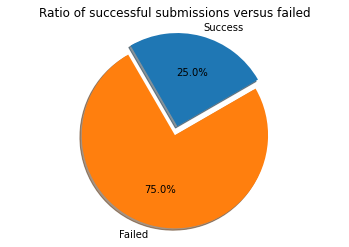

In [ ]:

labels = 'Success', 'Failed'
sizes = [total_success, total_failed]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Ratio of successful submissions versus failed")
plt.show()

In [ ]:
total_submissions_selected_courses  = metadata_df.shape[0]
success_percent = total_success/(total_success + total_failed)
print(f"According to the data, we can have a dataset with a maximum of {int(total_submissions_selected_courses*success_percent)} entries")

According to the data, we can have a dataset with a maximum of 4049 entries


In [ ]:
success_group_by_username = metadata_df[metadata_df['result'] == 'success'].groupby(['task', 'username']).result.count()
success_group_by_username

task              username                        
example_1         00746ec695c20d19d4122390c35bb854    1
                  00950c1b15fe28b8200e4a6f855abbd2    1
                  014aa47f1bf1a0096b64d73ca6212b31    1
                  0389dc36c1df2f22533425a7443e31ee    1
                  03e42aacb050ab8e4dabfd53fe957f0c    1
                                                     ..
p9_string_slices  dc4543d8c1d7d7bbcf5d5ae68497c77a    1
                  e581fe470f24274d138e621ab089e1b2    1
                  f0aa19721aff81b2c5d3da2ccd10c3a1    1
                  f378e4b762177284f73df4c64bb0c01b    1
                  fa55d3d687eb284094612392f6c59284    2
Name: result, Length: 3264, dtype: int64

In [ ]:
success_group_by_username.describe()

count    3264.000000
mean        1.240502
std         0.651786
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: result, dtype: float64

In [ ]:
taskid, user = success_group_by_username.index[np.argmax(success_group_by_username)]
metadata_df[metadata_df['username'] == user][metadata_df['task'] == taskid][metadata_df['result'] == 'success']

/tmp/ipykernel_1282/3290847324.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metadata_df[metadata_df['username'] == user][metadata_df['task'] == taskid][metadata_df['result'] == 'success']


,Unnamed: 0,date,courseid,task,username,result,submission,lang,type,saved
4473,4473,2022-04-20 17:52:35.191,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,62608eb3234fb5da74057c93,python3,code_multiple_languages,True
4474,4474,2022-04-20 17:53:32.006,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,62608eec53843203b444f769,python3,code_multiple_languages,True
4477,4477,2022-04-20 17:59:22.628,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,6260904a234fb5da74057cbc,python3,code_multiple_languages,True
4478,4478,2022-04-20 18:05:14.520,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,626091aa53843203b444f770,python3,code_multiple_languages,True
4480,4480,2022-04-20 18:07:06.914,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,6260921a234fb5da74057cef,python3,code_multiple_languages,True
4481,4481,2022-04-20 18:07:46.129,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,6260924253843203b444f77a,python3,code_multiple_languages,True
4482,4482,2022-04-20 18:09:38.968,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,626092b253843203b444f78c,python3,code_multiple_languages,True
4483,4483,2022-04-20 18:11:34.028,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,62609326234fb5da74057d11,python3,code_multiple_languages,True
4485,4485,2022-04-20 18:19:02.807,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,626094e653843203b444f79d,python3,code_multiple_languages,True
4486,4486,2022-04-20 18:22:06.723,IALPCP-GroupMLDS-2021-2,h0_demo,ac96197d2c7a7cbab8f10f7e8446e013,success,6260959e53843203b444f7a7,python3,code_multiple_languages,True


Text(0.5, 0, 'Trials')

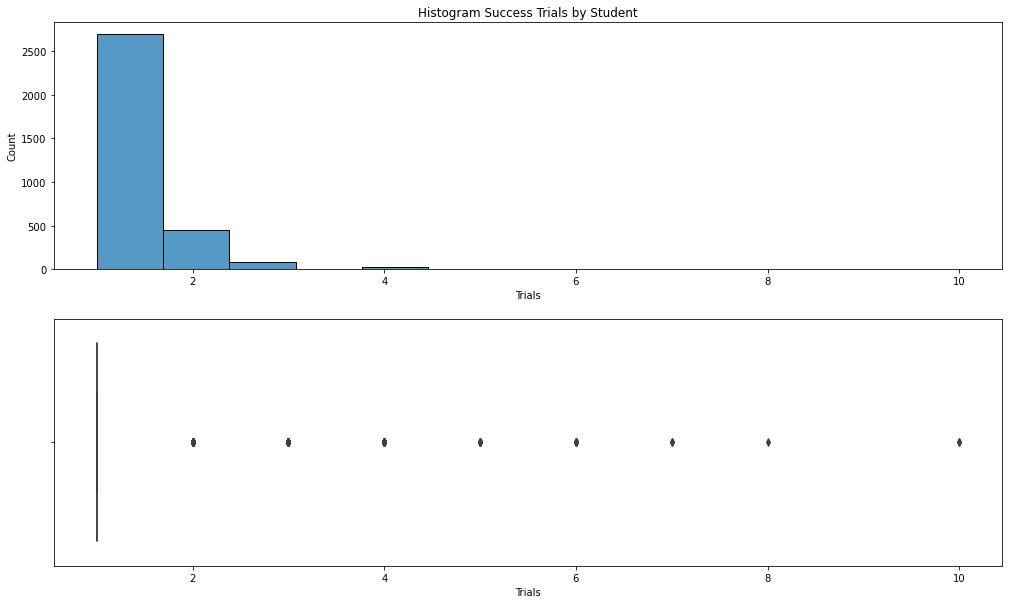

In [ ]:
plt.figure(figsize=(17,10))
plt.subplot(2, 1, 1)
ax = sns.histplot(data=success_group_by_username)
ax.set_title(f"Histogram Success Trials by Student")
ax.set_xlabel('Trials')
plt.subplot(2, 1, 2)
ax = sns.boxplot(x=success_group_by_username)
ax.set_xlabel('Trials')

In [ ]:
failed_group_by_username = metadata_df[metadata_df['result'] == 'failed'].groupby(['task', 'username']).result.count()
failed_group_by_username

task              username                        
example_1         00746ec695c20d19d4122390c35bb854    6
                  00950c1b15fe28b8200e4a6f855abbd2    6
                  014aa47f1bf1a0096b64d73ca6212b31    9
                  0389dc36c1df2f22533425a7443e31ee    1
                  03e42aacb050ab8e4dabfd53fe957f0c    4
                                                     ..
p9_string_slices  dc4543d8c1d7d7bbcf5d5ae68497c77a    1
                  e581fe470f24274d138e621ab089e1b2    3
                  f0aa19721aff81b2c5d3da2ccd10c3a1    1
                  f378e4b762177284f73df4c64bb0c01b    2
                  fa55d3d687eb284094612392f6c59284    1
Name: result, Length: 3264, dtype: int64

In [ ]:
failed_group_by_username.describe()

count    3264.000000
mean        3.716299
std         5.205236
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       105.000000
Name: result, dtype: float64

In [ ]:
taskid, user = failed_group_by_username.index[np.argmax(failed_group_by_username)]
metadata_df[metadata_df['username'] == user][metadata_df['task'] == taskid][metadata_df['result'] == 'failed']

/tmp/ipykernel_1282/4008674714.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metadata_df[metadata_df['username'] == user][metadata_df['task'] == taskid][metadata_df['result'] == 'failed']


,Unnamed: 0,date,courseid,task,username,result,submission,lang,type,saved
1533,1533,2022-04-06 00:09:52.967,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624d20a0b430b9f7eb144b4f,python3,code_multiple_languages,True
1534,1534,2022-04-06 00:11:23.518,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624d20fb08d3ba96ab7ecede,python3,code_multiple_languages,True
1535,1535,2022-04-06 00:12:24.142,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624d2138b430b9f7eb144b5c,python3,code_multiple_languages,True
1536,1536,2022-04-06 00:13:22.785,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624d217208d3ba96ab7ecee8,python3,code_multiple_languages,True
1537,1537,2022-04-06 00:14:33.450,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624d21b9b430b9f7eb144b69,python3,code_multiple_languages,True
...,...,...,...,...,...,...,...,...,...,...
1633,1633,2022-04-06 12:44:53.186,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624dd19508d3ba96ab7ed290,python3,code_multiple_languages,True
1634,1634,2022-04-06 12:45:19.957,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624dd1af08d3ba96ab7ed295,python3,code_multiple_languages,True
1635,1635,2022-04-06 12:46:08.129,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624dd1e0b430b9f7eb1450e8,python3,code_multiple_languages,True
1636,1636,2022-04-06 12:46:55.777,IALPCP-GroupMLDS-2021-2,example_1,4319bdb9036d70bcb9fdd3ca3f795223,failed,624dd20fb430b9f7eb1450ee,python3,code_multiple_languages,True


Text(0.5, 0, 'Trials')

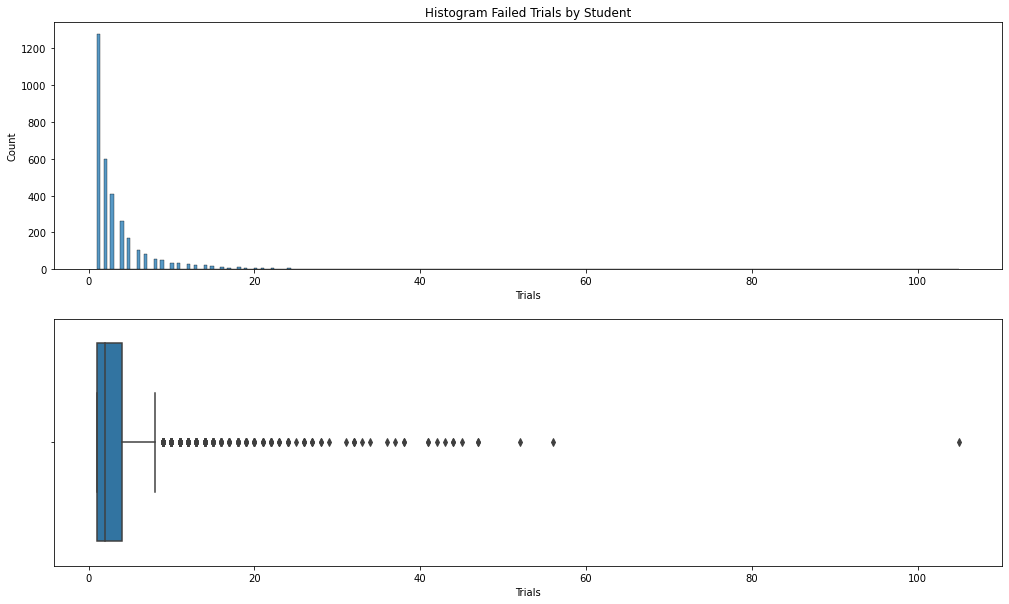

In [ ]:
plt.figure(figsize=(17,10))
plt.subplot(2, 1, 1)
ax = sns.histplot(data=failed_group_by_username)
ax.set_title(f"Histogram Failed Trials by Student")
ax.set_xlabel('Trials')
plt.subplot(2, 1, 2)
ax = sns.boxplot(x=failed_group_by_username)
ax.set_xlabel('Trials')


In [ ]:
# ¿Cuál es la distribución de los lenguajes?

lang_dist = metadata_df.groupby(['lang']).submission.count().sort_values(ascending=False)
lang_dist

lang
python3    16179
Name: submission, dtype: int64

## Differences between success and failed solutions

In this section, two python libraries are used: editdistance and difflib, in order to compare failed and success submissions. The ultimate goal is to build pairs of failed and success code snippets with changes that only involve a single line of code.

This is useful for training repair models. This idea is motivated by the work ["How Often Do Single-Statement Bugs Occur?: The ManySStuBs4J Dataset"](http://arxiv.org/abs/1905.13334)

![process](./assets/Dise%C3%B1o%20preliminar%20de%20la%20investigaci%C3%B3n-dataset%20building.drawio.png)

In [ ]:
# basic test edit distance
import editdistance
editdistance.eval('banana', 'banama')

1

In [ ]:
# basic test difflib
from difflib import SequenceMatcher
str1 = 'I like pizza'
str2 = 'I like tacos'
seq = SequenceMatcher(a=str1, b=str2)
print(seq.ratio())

0.6666666666666666


In [ ]:
from difflib import Differ
str1 = "I would like to order a pepperoni pizza"
str2 = "I would like to order a veggie burger"
str1_lines = str1.splitlines()
str2_lines = str2.splitlines()
d = Differ()
diff = d.compare(str1_lines, str2_lines)
print('\n'.join(diff))

- I would like to order a pepperoni pizza
+ I would like to order a veggie burger


In [ ]:
metadata_py3 = metadata_df[metadata_df['lang'] == 'python3']
metadata_py3 = metadata_df[metadata_df['saved'] == True]
metadata_py3 = metadata_py3[['date', 'courseid', 'task', 'username', 'result', 'submission']]

In [ ]:
# construimos una nueva columna path para acceder a los archivos
metadata_py3['path'] = (f'{base_path}/' +
                        metadata_py3['task']     + '/' + 
                        metadata_py3['username'] + '/' + 
                        metadata_py3['result'] + '/' + 
                        metadata_py3['submission'] + '.py')

In [ ]:
metadata_py3.head()

,date,courseid,task,username,result,submission,path
0,2021-09-22 12:22:11.021,IALPCP-GroupMLDS-2021-2,example_1,1ca3b9559f8c1785fa68f9c881bad75d,failed,614b664314f5fb141c9d4570,dataset_project_ml/example_1/1ca3b9559f8c1785f...
1,2021-09-22 12:22:33.940,IALPCP-GroupMLDS-2021-2,example_1,1ca3b9559f8c1785fa68f9c881bad75d,success,614b665914f5fb141c9d4577,dataset_project_ml/example_1/1ca3b9559f8c1785f...
2,2021-09-01 11:23:36.585,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,failed,612fa908470407b924c686f5,dataset_project_ml/example_1/25654364f052d7175...
3,2021-09-01 11:25:27.472,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,failed,612fa977470407b924c68701,dataset_project_ml/example_1/25654364f052d7175...
4,2021-09-01 11:26:00.128,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,failed,612fa998470407b924c68707,dataset_project_ml/example_1/25654364f052d7175...


In [ ]:
metadata_py3.shape

(16179, 7)

In [ ]:
import re

def load_code(paths):
    code_list = []

    for item in paths:         
        try: 
            with open(item) as f:
                code = f.read()
                code_without_comments = re.sub(r"(#+.*?\n{1})", "", code)
                code_list.append(code_without_comments)
        except FileNotFoundError:
            print(f"{item} not found")
    return code_list

In [ ]:
def process_changes(diff):
    changes = list(
                filter(lambda fc: fc in ['+', '-', '?'], 
                    map(lambda s: s[0], diff)))

    insertions = 0
    deletions = 0
    missings = 0

    for c in changes:
        if c == '?':
            missings += 1
        if c == '-':
            deletions += 1
        if c == '+':
            insertions += 1
    all_changes = '\n'.join(diff)
    return insertions, deletions, missings, all_changes

In [ ]:
def process_submissions(metadata_df):
    edit_distances = []
    seq_ratios = []
    diffs = []
    len_snippet_0 = []
    lines_snippet_0 = []
    len_snippet_1 = []
    lines_snippet_1 = []
    insertions = []
    deletions = []
    missings = []

    differ = Differ()
    
    code_list = load_code(metadata_df['path'].values)
    
    for c in zip(code_list, code_list[1:]):
        editd = editdistance.eval(c[0], c[1])
        seq = SequenceMatcher(a=c[0], b=c[1])

        c0_lines = c[0].splitlines()
        c1_lines = c[1].splitlines()
        diff = differ.compare(c0_lines, c1_lines)

        len_snippet_0.append(len(c[0]))
        len_snippet_1.append(len(c[1]))
        lines_snippet_0.append(len(c0_lines))
        lines_snippet_1.append(len(c1_lines))
        edit_distances.append(editd)
        seq_ratios.append(seq.ratio())

        num_insertions, num_deletions, num_missings, changes = process_changes(list(diff))
        diffs.append(changes)
        insertions.append(num_insertions)
        deletions.append(num_deletions)
        missings.append(num_missings)

    change_to_success = (metadata_df['result'][:-1].values + "," +metadata_df['result'][1:].values) == 'failed,success'

    return pd.DataFrame({
        'taskid': metadata_df['task'][1:], 
        'snipped_0': metadata_df['submission'].values[:-1], 
        'len_snippet_0': len_snippet_0,
        'lines_snippet_0': lines_snippet_0,
        'snipped_1': metadata_df['submission'].values[1:], 
        'len_snippet_1': len_snippet_1,
        'lines_snippet_1': lines_snippet_1,
        'edit_distance': edit_distances, 
        'seq_ratios': seq_ratios, 
        'change_to_success': change_to_success,
        'insertions': insertions,
        'deletions': deletions,
        'missings': missings,
        'diff': diffs
        })


In [ ]:
tasks = metadata_py3['task'].unique()
tasks

array(['example_1', 'example_2', 'example_3', 'h0_demo',
       'h1_physical_exam', 'h2_guess_num', 'h3_reproduction_list',
       'p13_it_dict', 'p14_set', 'p1_variables', 'p2_strings_op',
       'p3_num_op', 'p4_point_rectangle', 'p5_leap_year', 'p6_hdd',
       'p7_calc_pi', 'p8_list_iteration', 'p9_string_slices'],
      dtype=object)

In [ ]:
for taskid in tasks:
    print('taskid: ', taskid)
    aux_task = metadata_py3[(metadata_py3['task'] == taskid)]
    users = aux_task['username'].unique()
    comp_subs_by_task = pd.concat([process_submissions(aux_task[aux_task['username'] == user]) for user in users])
    comp_subs_by_task_path = f"{base_path}/{taskid}/{taskid}.csv"
    print('saving in: ', comp_subs_by_task_path)
    comp_subs_by_task.to_csv(comp_subs_by_task_path)
    

taskid:  example_1
saving in:  dataset_project_ml/example_1/example_1.csv
taskid:  example_2
saving in:  dataset_project_ml/example_2/example_2.csv
taskid:  example_3
saving in:  dataset_project_ml/example_3/example_3.csv
taskid:  h0_demo
saving in:  dataset_project_ml/h0_demo/h0_demo.csv
taskid:  h1_physical_exam
saving in:  dataset_project_ml/h1_physical_exam/h1_physical_exam.csv
taskid:  h2_guess_num
saving in:  dataset_project_ml/h2_guess_num/h2_guess_num.csv
taskid:  h3_reproduction_list
saving in:  dataset_project_ml/h3_reproduction_list/h3_reproduction_list.csv
taskid:  p13_it_dict
saving in:  dataset_project_ml/p13_it_dict/p13_it_dict.csv
taskid:  p14_set
saving in:  dataset_project_ml/p14_set/p14_set.csv
taskid:  p1_variables
saving in:  dataset_project_ml/p1_variables/p1_variables.csv
taskid:  p2_strings_op
saving in:  dataset_project_ml/p2_strings_op/p2_strings_op.csv
taskid:  p3_num_op
saving in:  dataset_project_ml/p3_num_op/p3_num_op.csv
taskid:  p4_point_rectangle
saving

In [ ]:
def merge_all_csv(base_path, tasks, save=True):
    partial_metadata_list = []
    for taskid in tasks:
        partial_df = pd.read_csv(f"{base_path}/{taskid}/{taskid}.csv") 
        partial_metadata_list.append(partial_df)
        
    metadata_df = pd.concat(partial_metadata_list)
    metadata_df = metadata_df[['taskid', 'snipped_0', 'len_snippet_0', 'lines_snippet_0', 'snipped_1', 'len_snippet_1', 'lines_snippet_1', 'edit_distance', 'seq_ratios', 'change_to_success', 'insertions', 'deletions', 'missings', 'diff']]
    if save:
        metadata_df.to_csv(f"{base_path}/comparisons.csv", index=False)
    return metadata_df

In [ ]:
comparisons_df = merge_all_csv(base_path, tasks)

In [ ]:
comparisons_df.head()

,taskid,snipped_0,len_snippet_0,lines_snippet_0,snipped_1,len_snippet_1,lines_snippet_1,edit_distance,seq_ratios,change_to_success,insertions,deletions,missings,diff
0,example_1,614b664314f5fb141c9d4570,175,6,614b665914f5fb141c9d4577,176,6,1,0.997151,True,1,1,1,x0 = float ( input() )\n v0 = float ( input...
1,example_1,612fa908470407b924c686f5,144,8,612fa977470407b924c68701,141,8,4,0.982456,False,1,1,2,\n x0=float(input())\n v0=float(input())\n...
2,example_1,612fa977470407b924c68701,141,8,612fa998470407b924c68707,143,8,2,0.992958,False,1,1,1,\n x0=float(input())\n v0=float(input())\n...
3,example_1,612fa998470407b924c68707,143,8,612fa9bb470407b924c6870f,143,8,1,0.993007,True,1,1,2,\n x0=float(input())\n v0=float(input())\n...
4,example_1,61311401470407b924c68ca7,156,6,61311434470407b924c68cac,157,6,1,0.996805,True,1,1,1,x0 = float(input())\n v0 = float(input())\n...


In [ ]:
comparisons_df.shape

(12915, 14)

In [ ]:
change_to_success_df = comparisons_df[comparisons_df['change_to_success'] == True]

In [ ]:
change_to_success_df.shape

(3300, 14)

In [ ]:
change_to_success_df.describe()


,len_snippet_0,lines_snippet_0,len_snippet_1,lines_snippet_1,edit_distance,seq_ratios,insertions,deletions,missings
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,298.147576,11.620606,299.344545,11.737273,35.343030,0.849923,2.503333,2.386667,1.702424
std,286.583972,9.010267,291.877544,9.265332,62.210366,0.215799,3.056057,2.820303,2.241401
min,1.000000,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,7.000000,148.000000,7.000000,2.000000,0.787630,1.000000,1.000000,1.000000
50%,219.000000,10.000000,221.000000,10.000000,11.000000,0.954545,1.000000,1.000000,1.000000
75%,342.250000,14.000000,340.000000,14.000000,43.000000,0.991453,3.000000,3.000000,2.000000
max,2849.000000,101.000000,2823.000000,101.000000,1009.000000,1.000000,37.000000,42.000000,23.000000


Text(0.5, 0, 'Number Code Lines')

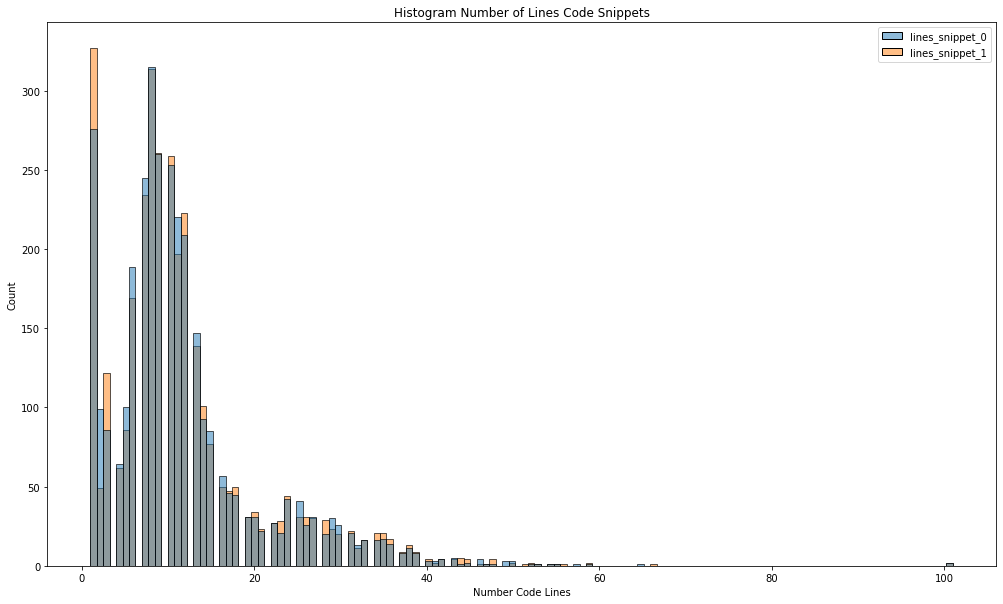

In [ ]:
import seaborn as sns
plt.figure(figsize=(17,10))
ax = sns.histplot(data=change_to_success_df[['lines_snippet_0', 'lines_snippet_1']])
ax.set_title(f"Histogram Number of Lines Code Snippets")
ax.set_xlabel('Number Code Lines')

Text(0.5, 17.200000000000003, 'Number of Operations')

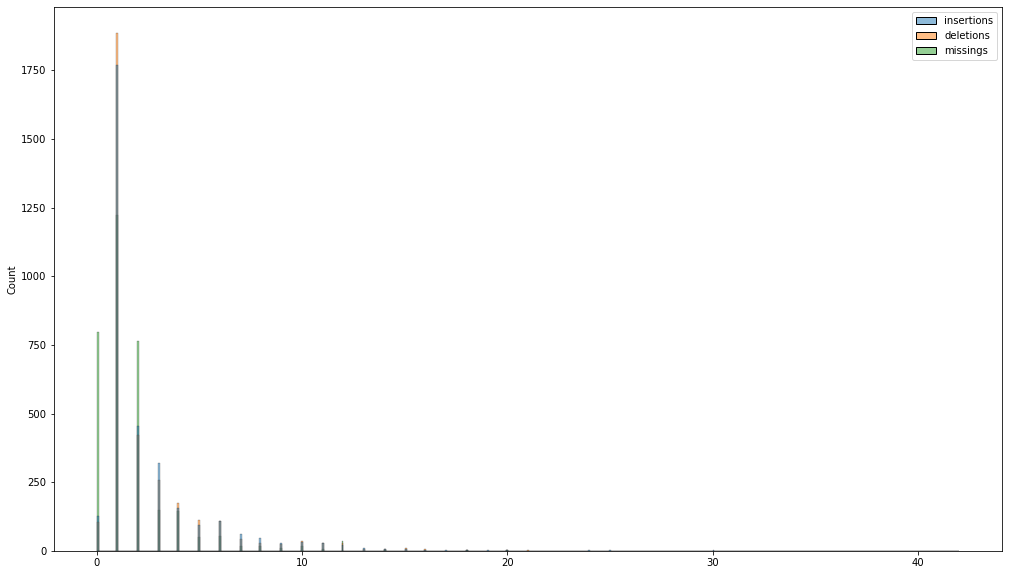

In [ ]:
plt.figure(figsize=(17,10))
sns.histplot(data=change_to_success_df[['insertions', 'deletions', 'missings']])
ax.set_title(f"Histogram Number of Operations Related to a Change to Successful")
ax.set_xlabel('Number of Operations')

<AxesSubplot:ylabel='Count'>

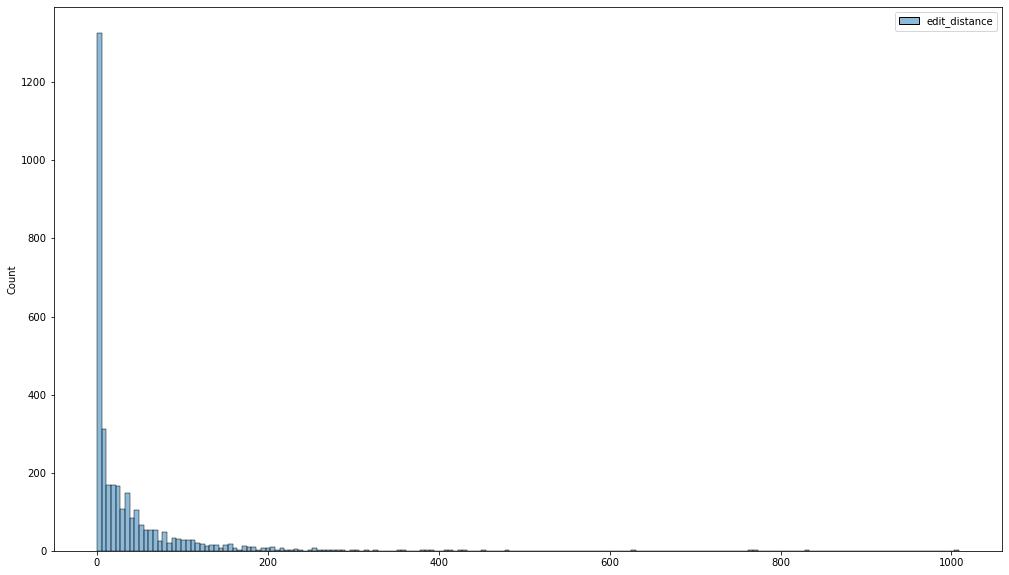

In [ ]:
plt.figure(figsize=(17,10))
sns.histplot(data=change_to_success_df[['edit_distance']])

## Extraction of lexical features from the code

In [ ]:
!pip install antlr4-python3-runtime==4.8

In [ ]:
!wget https://www.antlr.org/download/antlr-4.8-complete.jar

--2022-06-02 16:14:32--  https://www.antlr.org/download/antlr-4.8-complete.jar
Resolving www.antlr.org (www.antlr.org)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to www.antlr.org (www.antlr.org)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2089101 (2.0M) [application/java-archive]
Saving to: ‘antlr-4.8-complete.jar’

antlr-4.8-complete. 100%[===================>]   1.99M  1.01MB/s    in 2.0s    

2022-06-02 16:14:34 (1.01 MB/s) - ‘antlr-4.8-complete.jar’ saved [2089101/2089101]



In [ ]:
!wget https://raw.githubusercontent.com/antlr/grammars-v4/master/python/python3-py/Python3.g4

--2022-06-02 16:14:38--  https://raw.githubusercontent.com/antlr/grammars-v4/master/python/python3-py/Python3.g4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26611 (26K) [text/plain]
Saving to: ‘Python3.g4’

Python3.g4          100%[===================>]  25.99K  --.-KB/s    in 0.03s   

2022-06-02 16:14:38 (953 KB/s) - ‘Python3.g4’ saved [26611/26611]



In [ ]:
!java -cp antlr-4.8-complete.jar org.antlr.v4.Tool -Dlanguage=Python3 Python3.g4 -o dist

In [ ]:
import sys
sys.path.append('dist')
from antlr4 import *
from antlr4.tree.Trees import Trees
from dist.Python3Lexer import Python3Lexer 

In [ ]:
def build_token_to_idx(pathtokens, limit=99):

    # read file
    lines = []
    with open(pathtokens) as f:
        lines = f.readlines()
    # create index
    mapTokenIdx = {}
    for l in lines[:limit]:
        [v, k] = l.split('\n')[0].split('=')
        mapTokenIdx[int(k)] = v
    #ADD eof
    mapTokenIdx[-1] = 'EOF'
    return mapTokenIdx

In [ ]:
#Adapted from TALP-2020 course code
class SourceCodeFeatures:
    def __init__(self, mapTokenIdx):
        self.mapTokenIdx = mapTokenIdx
    
    def lex(self, source_code): 
        self.streamIn = InputStream(source_code)
        self.lexer = Python3Lexer(self.streamIn)
        self.tokenStream = CommonTokenStream(self.lexer)
        return

    # Método usado para contar las frecuencias de todos los tokens durante el
    # análisis léxico.
    def getAllTokensFreq (self) :
        cnt = [0] * (len(self.mapTokenIdx)+1)
        tokenTypes = []
        self.tokenStream.fill()   # Get all tokens from lexer until EOF
        for tk in self.tokenStream.tokens:
            cnt[tk.type] += 1
            tokenTypes.append(self.mapTokenIdx[tk.type])
        return cnt, tokenTypes

In [ ]:
from alive_progress import alive_bar

def build_tokens_freq_matrix(df):
    mapTokenIdx = build_token_to_idx('dist/Python3.tokens')
    scf = SourceCodeFeatures(mapTokenIdx)
    tokens_freq_list = []
    tokens_join_list = []
    code_not_found = []
    items = df['path'].values
    total = len(items)
    with alive_bar(total) as bar:  # declare your expected total
        for item in items:         # <<-- your original loop
            try: 
                with open(item) as f:
                    code = f.read()
                scf.lex(code)
                tokens_freq, tokenTypes = scf.getAllTokensFreq()
                tokens_freq_list.append(tokens_freq)
                tokens_join_list.append(' '.join(tokenTypes))
            except FileNotFoundError:
                code_not_found.append(item)
            #reset lexer
            #scf.lexer.reset()    
            bar()       
    return tokens_freq_list, tokens_join_list, code_not_found


In [ ]:
change_to_success_df.shape

(3300, 14)

In [ ]:
select_criteria = change_to_success_df['edit_distance'].mean() + change_to_success_df['edit_distance'].std()
select_criteria

97.5533963381537

In [ ]:
change_to_success_2_df = change_to_success_df[change_to_success_df['edit_distance'] < select_criteria]

change_to_success_2_df.shape

(2961, 14)

In [ ]:
change_to_success_2_df.describe()

,len_snippet_0,lines_snippet_0,len_snippet_1,lines_snippet_1,edit_distance,seq_ratios,insertions,deletions,missings
count,2961.000000,2961.000000,2961.000000,2961.000000,2961.000000,2961.000000,2961.000000,2961.000000,2961.000000
mean,280.266464,11.129348,279.578183,11.126309,19.367781,0.883993,1.898007,1.901047,1.628504
std,274.885145,8.763551,278.939491,8.909241,23.515553,0.180448,1.797445,1.895229,2.114090
min,1.000000,1.000000,21.000000,1.000000,0.000000,0.023669,0.000000,0.000000,0.000000
25%,136.000000,6.000000,136.000000,6.000000,2.000000,0.856436,1.000000,1.000000,1.000000
50%,211.000000,9.000000,213.000000,9.000000,8.000000,0.968523,1.000000,1.000000,1.000000
75%,316.000000,13.000000,313.000000,13.000000,31.000000,0.993289,2.000000,2.000000,2.000000
max,2849.000000,101.000000,2823.000000,101.000000,97.000000,1.000000,16.000000,18.000000,22.000000


Analysis to failed samples

In [ ]:
failed_df = change_to_success_2_df[['snipped_0', 'edit_distance']]
failed_df['submission'] = failed_df['snipped_0']
failed_df = failed_df.merge(metadata_py3, on='submission', how='inner')
failed_df.head()

/tmp/ipykernel_1282/4065753364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_df['submission'] = failed_df['snipped_0']


,snipped_0,edit_distance,submission,date,courseid,task,username,result,path
0,614b664314f5fb141c9d4570,1,614b664314f5fb141c9d4570,2021-09-22 12:22:11.021,IALPCP-GroupMLDS-2021-2,example_1,1ca3b9559f8c1785fa68f9c881bad75d,failed,dataset_project_ml/example_1/1ca3b9559f8c1785f...
1,612fa998470407b924c68707,1,612fa998470407b924c68707,2021-09-01 11:26:00.128,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,failed,dataset_project_ml/example_1/25654364f052d7175...
2,61311401470407b924c68ca7,1,61311401470407b924c68ca7,2021-09-02 13:12:17.791,IALPCP-GroupMLDS-2021-2,example_1,bacdaf0438e31d614504b59c71c8cdde,failed,dataset_project_ml/example_1/bacdaf0438e31d614...
3,6131a4360baf9f32118e8429,1,6131a4360baf9f32118e8429,2021-09-02 23:27:34.661,IALPCP-GroupMLDS-2021-2,example_1,6218ad692aedc0dddd23df9c3ac243ef,failed,dataset_project_ml/example_1/6218ad692aedc0ddd...
4,61338cac470407b924c693cc,1,61338cac470407b924c693cc,2021-09-04 10:11:40.983,IALPCP-GroupMLDS-2021-2,example_1,874c356a3e910f076cc89cc1175e9a8f,failed,dataset_project_ml/example_1/874c356a3e910f076...


In [ ]:
(tokens_freq_list, tokens_join_list, code_not_found) = build_tokens_freq_matrix(failed_df)

|████████████████████████████████████████| 2961/2961 [100%] in 13:54.0 (3.55/s) 


In [ ]:
code_not_found

[]

In [ ]:
# Creamos un dataframe con la representación en frecuencias.
mapTokenIdx = build_token_to_idx('dist/Python3.tokens')
toks_freq_matrix = np.array(tokens_freq_list)
toks_freq_matrix_df = pd.DataFrame(toks_freq_matrix, columns=['', *mapTokenIdx.values()])
toks_freq_matrix_df.to_csv('toks_freq_matrix_failed_df.csv')
toks_freq_matrix_df.head()

,,STRING,NUMBER,INTEGER,DEF,RETURN,RAISE,FROM,IMPORT,AS,...,XOR_ASSIGN,LEFT_SHIFT_ASSIGN,RIGHT_SHIFT_ASSIGN,POWER_ASSIGN,IDIV_ASSIGN,SKIP_,UNKNOWN_CHAR,INDENT,DEDENT,EOF
0,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
toks_freq_matrix_df.shape

(2961, 101)

Text(0.5, 0, 'Number of tokens')

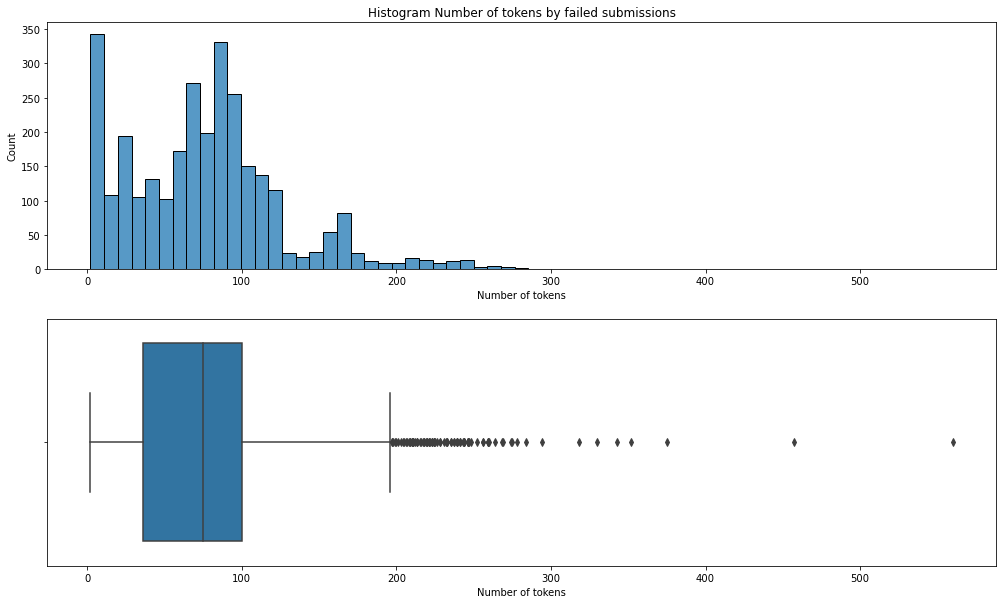

In [ ]:
toks_freq_matrix_df_sum_by_rows = toks_freq_matrix_df.sum(axis=1)
plt.figure(figsize=(17,10))
plt.subplot(2, 1, 1)
ax = sns.histplot(data=toks_freq_matrix_df_sum_by_rows)
ax.set_title(f"Histogram Number of tokens by failed submissions")
ax.set_xlabel('Number of tokens')
plt.subplot(2, 1, 2)
ax = sns.boxplot(x=toks_freq_matrix_df_sum_by_rows)
ax.set_xlabel('Number of tokens')

In [ ]:
tokens_join_df = pd.DataFrame({'tokens_join': tokens_join_list})
tokens_join_df.to_csv('tokens_join_failed_df.csv')

In [ ]:
tokens_join_df.head()

,tokens_join
0,NAME ASSIGN NAME OPEN_PAREN NAME OPEN_PAREN CL...
1,NEWLINE NAME ASSIGN NAME OPEN_PAREN NAME OPEN_...
2,NAME ASSIGN NAME OPEN_PAREN NAME OPEN_PAREN CL...
3,NAME ASSIGN NAME OPEN_PAREN CLOSE_PAREN NEWLIN...
4,NAME ASSIGN NAME OPEN_PAREN NAME OPEN_PAREN CL...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def _get_top_ngram_from_vec(vec,corpus):
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), analyzer='word').fit(corpus)
    return _get_top_ngram_from_vec(vec, corpus)

def _get_top_ngram_ast(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), analyzer='word', token_pattern=r"\S*").fit(corpus)
    return _get_top_ngram_from_vec(vec, corpus)


def plot_top_ngrams_barchart(dataset_name, top_n_bigrams, top=15):
    x,y=map(list,zip(*top_n_bigrams[:top]))
    ax = sns.barplot(x=y,y=x)
    ax.set_title(f'{dataset_name}: Top {top} most frequent ngrams')

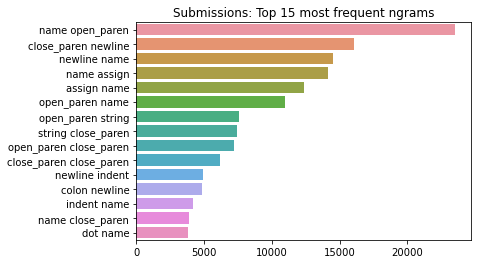

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 2)
plot_top_ngrams_barchart('Submissions', top_ngram)

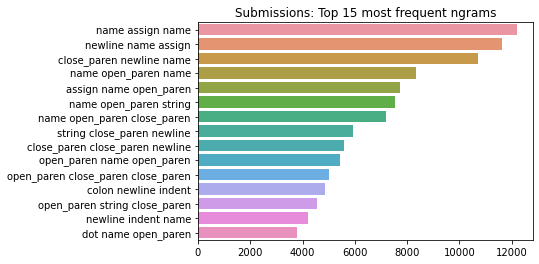

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 3)
plot_top_ngrams_barchart('Submissions', top_ngram)

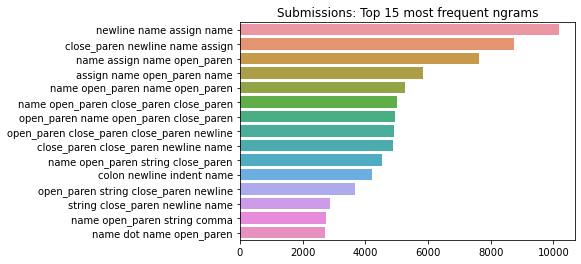

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 4)
plot_top_ngrams_barchart('Submissions', top_ngram)

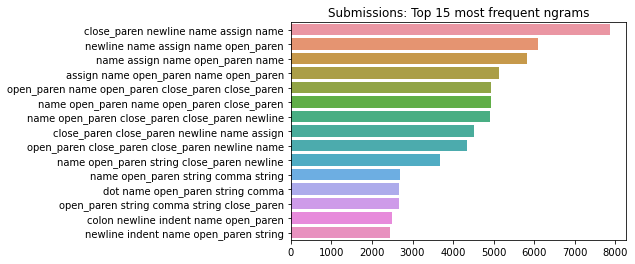

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 5)
plot_top_ngrams_barchart('Submissions', top_ngram)

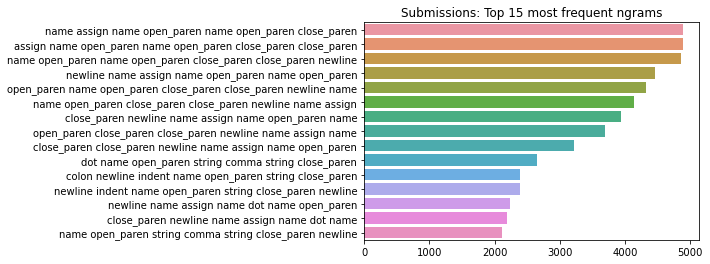

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 7)
plot_top_ngrams_barchart('Submissions', top_ngram)

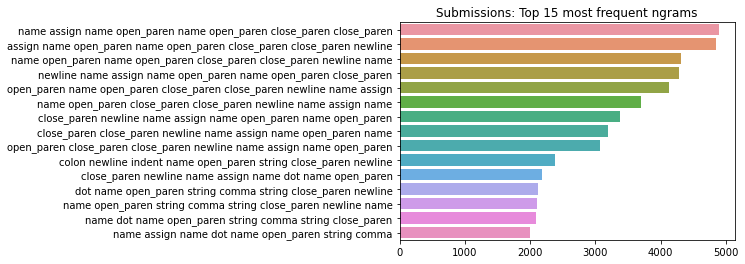

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 8)
plot_top_ngrams_barchart('Submissions', top_ngram)

Analysis to success samples

In [ ]:
success_df = change_to_success_2_df[['snipped_1', 'edit_distance']]
success_df['submission'] = success_df['snipped_1']
success_df = success_df.merge(metadata_py3, on='submission', how='inner')
success_df.head()

/tmp/ipykernel_1282/2867581409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_df['submission'] = success_df['snipped_1']


,snipped_1,edit_distance,submission,date,courseid,task,username,result,path
0,614b665914f5fb141c9d4577,1,614b665914f5fb141c9d4577,2021-09-22 12:22:33.940,IALPCP-GroupMLDS-2021-2,example_1,1ca3b9559f8c1785fa68f9c881bad75d,success,dataset_project_ml/example_1/1ca3b9559f8c1785f...
1,612fa9bb470407b924c6870f,1,612fa9bb470407b924c6870f,2021-09-01 11:26:35.088,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,success,dataset_project_ml/example_1/25654364f052d7175...
2,61311434470407b924c68cac,1,61311434470407b924c68cac,2021-09-02 13:13:08.241,IALPCP-GroupMLDS-2021-2,example_1,bacdaf0438e31d614504b59c71c8cdde,success,dataset_project_ml/example_1/bacdaf0438e31d614...
3,6131a988470407b924c68f23,1,6131a988470407b924c68f23,2021-09-02 23:50:16.696,IALPCP-GroupMLDS-2021-2,example_1,6218ad692aedc0dddd23df9c3ac243ef,success,dataset_project_ml/example_1/6218ad692aedc0ddd...
4,61338cdb470407b924c693d2,1,61338cdb470407b924c693d2,2021-09-04 10:12:27.597,IALPCP-GroupMLDS-2021-2,example_1,874c356a3e910f076cc89cc1175e9a8f,success,dataset_project_ml/example_1/874c356a3e910f076...


In [ ]:
(tokens_freq_list_s, tokens_join_list_s, code_not_found_s) = build_tokens_freq_matrix(success_df)

|████████████████████████████████████████| 2961/2961 [100%] in 12:41.3 (3.89/s) 


In [ ]:
code_not_found_s

[]

In [ ]:
# Creamos un dataframe con la representación en frecuencias.
mapTokenIdx = build_token_to_idx('dist/Python3.tokens')
toks_freq_matrix = np.array(tokens_freq_list)
toks_freq_matrix_df = pd.DataFrame(toks_freq_matrix, columns=['', *mapTokenIdx.values()])
toks_freq_matrix_df.to_csv('toks_freq_matrix_success_df.csv')
toks_freq_matrix_df.head()

,,STRING,NUMBER,INTEGER,DEF,RETURN,RAISE,FROM,IMPORT,AS,...,XOR_ASSIGN,LEFT_SHIFT_ASSIGN,RIGHT_SHIFT_ASSIGN,POWER_ASSIGN,IDIV_ASSIGN,SKIP_,UNKNOWN_CHAR,INDENT,DEDENT,EOF
0,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 0, 'Number of tokens')

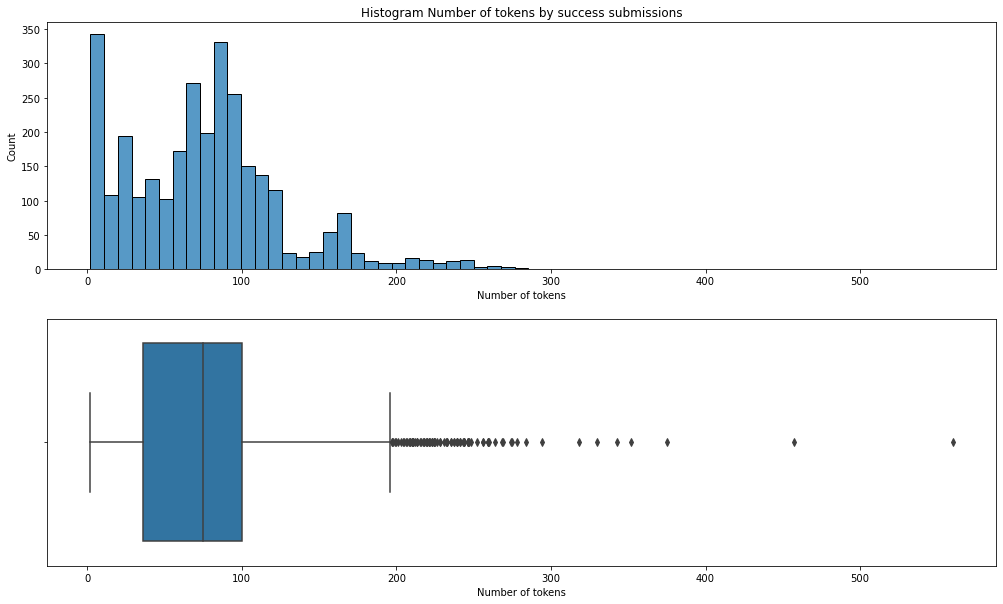

In [ ]:
toks_freq_matrix_df_sum_by_rows = toks_freq_matrix_df.sum(axis=1)
plt.figure(figsize=(17,10))
plt.subplot(2, 1, 1)
ax = sns.histplot(data=toks_freq_matrix_df_sum_by_rows)
ax.set_title(f"Histogram Number of tokens by success submissions")
ax.set_xlabel('Number of tokens')
plt.subplot(2, 1, 2)
ax = sns.boxplot(x=toks_freq_matrix_df_sum_by_rows)
ax.set_xlabel('Number of tokens')

In [ ]:
tokens_join_df = pd.DataFrame({'tokens_join': tokens_join_list})
tokens_join_df.to_csv('tokens_join_success_df.csv')

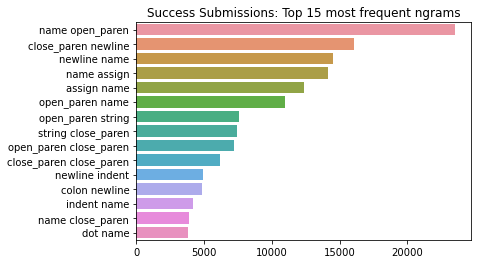

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 2)
plot_top_ngrams_barchart('Success Submissions', top_ngram)

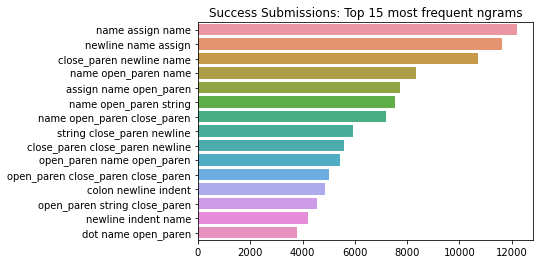

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 3)
plot_top_ngrams_barchart('Success Submissions', top_ngram)

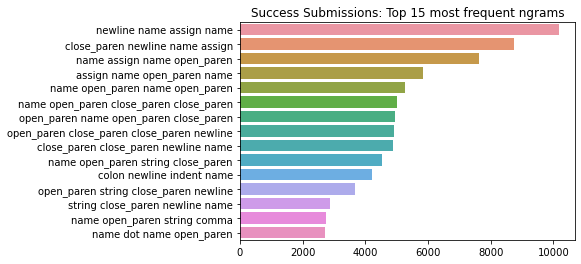

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 4)
plot_top_ngrams_barchart('Success Submissions', top_ngram)

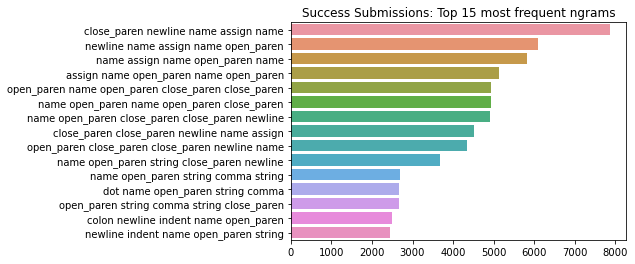

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 5)
plot_top_ngrams_barchart('Success Submissions', top_ngram)

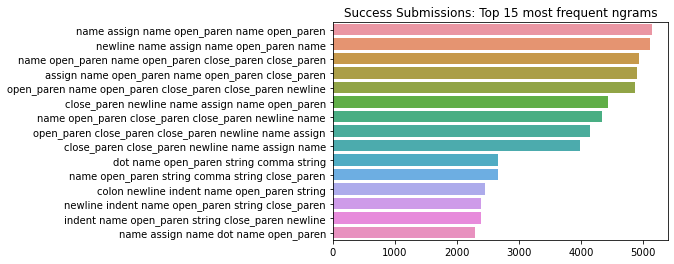

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 6)
plot_top_ngrams_barchart('Success Submissions', top_ngram)

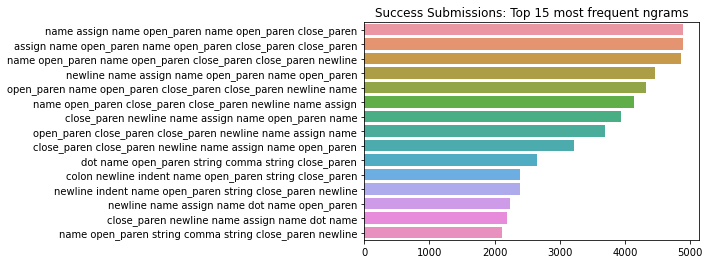

In [ ]:
top_ngram = _get_top_ngram(tokens_join_df['tokens_join'], 7)
plot_top_ngrams_barchart('Success Submissions', top_ngram)

Prepare code for training the models.

In [ ]:
success_df.head()

,snipped_1,edit_distance,submission,date,courseid,task,username,result,path
0,614b665914f5fb141c9d4577,1,614b665914f5fb141c9d4577,2021-09-22 12:22:33.940,IALPCP-GroupMLDS-2021-2,example_1,1ca3b9559f8c1785fa68f9c881bad75d,success,dataset_project_ml/example_1/1ca3b9559f8c1785f...
1,612fa9bb470407b924c6870f,1,612fa9bb470407b924c6870f,2021-09-01 11:26:35.088,IALPCP-GroupMLDS-2021-2,example_1,25654364f052d7175e182db76aa28a7a,success,dataset_project_ml/example_1/25654364f052d7175...
2,61311434470407b924c68cac,1,61311434470407b924c68cac,2021-09-02 13:13:08.241,IALPCP-GroupMLDS-2021-2,example_1,bacdaf0438e31d614504b59c71c8cdde,success,dataset_project_ml/example_1/bacdaf0438e31d614...
3,6131a988470407b924c68f23,1,6131a988470407b924c68f23,2021-09-02 23:50:16.696,IALPCP-GroupMLDS-2021-2,example_1,6218ad692aedc0dddd23df9c3ac243ef,success,dataset_project_ml/example_1/6218ad692aedc0ddd...
4,61338cdb470407b924c693d2,1,61338cdb470407b924c693d2,2021-09-04 10:12:27.597,IALPCP-GroupMLDS-2021-2,example_1,874c356a3e910f076cc89cc1175e9a8f,success,dataset_project_ml/example_1/874c356a3e910f076...


In [ ]:
success_code = load_code(success_df['path'])

success_code = list(map(lambda code: code.replace('\n', '\\n'), success_code))

In [ ]:
import csv

def save_code(path, list_code):
        with open(path, mode='w') as f:
                w = csv.writer(f, delimiter='\n',  quotechar=' ', quoting=csv.QUOTE_MINIMAL)
                w.writerow(list_code)

In [ ]:
save_code('success_code.csv', success_code)

In [ ]:
failed_code = load_code(failed_df['path'])

failed_code = list(map(lambda code: code.replace('\n', '\\n'), failed_code))

In [ ]:
save_code('failed_code.csv', failed_code)